# Adding Branding Images to Plots in Matplotlib

When you create graphics that are published on the Web, it is safe to assume that they will appear not only on your Website but elsewhere as well. If you are a professional publisher you probably want to make sure that people can see where these graphic originated.

In this notebook I show two methods on how to add images to plots in matplotlib for branding purposes. The first and more straightforward method uses the [figimage API](http://matplotlib.org/api/figure_api.html#matplotlib.figure.Figure.figimage) and the second uses subplots and the [gridspec API](  http://matplotlib.org/users/gridspec.html) for positioning and sizing.

## Setup

First we load the necessary libraries, use the built-in `ggplot` style, load the logo and create a random time series as the data is secondary for the purpose of this notebook.

In [1]:
%matplotlib inline
%load_ext signature

import matplotlib as mpl
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import helpers

mpl.style.use('ggplot')
logo = plt.imread('img/ramiro.org-branding.png')
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2010', periods=1000)).cumsum()

## Adding a watermark image

In the first example we simply call the `plot` method on the [Pandas Series](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#series) object created above and receive a `AxesSubplot` object in return. We then set the title on that object and add the image in the lower left corner with low opacity so it does not hide features of the graph.

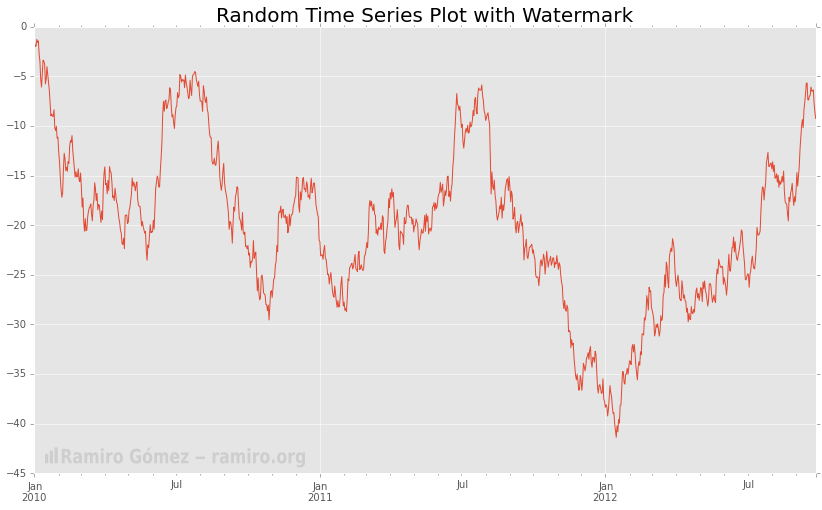

In [2]:
title = 'Random Time Series Plot with Watermark'

ax = ts.plot(figsize=(14, 8))
ax.set_title(title, fontsize=20)
ax.figure.figimage(logo, 40, 40, alpha=.15, zorder=1)

plt.savefig('img/{}.png'.format(helpers.slug(title)), bbox_inches='tight')

As far as I know the above method cannot be used to add the image outside of the axis grid. This works reasonably well for the time series plot you see, since there is a lot of unused space within the grid, but for other types of plots the result may not be desirable.

## Adding an image in a dedicated subplot

This method uses two subplots, one for the actual graph and one for the image. To make sure the image is smaller than the graph we first create a `GridSpec` with an appropriate height ratio. Next the first suplot is created, the title is set on it, then the dimensions and eventually the data is plotted.

Then the seconds subplot is created and the image added to it using the `imshow` method. Finally the `axis` method is called with the argument `off` to turn it off, i. e. don't display the axis grid for this subplot.

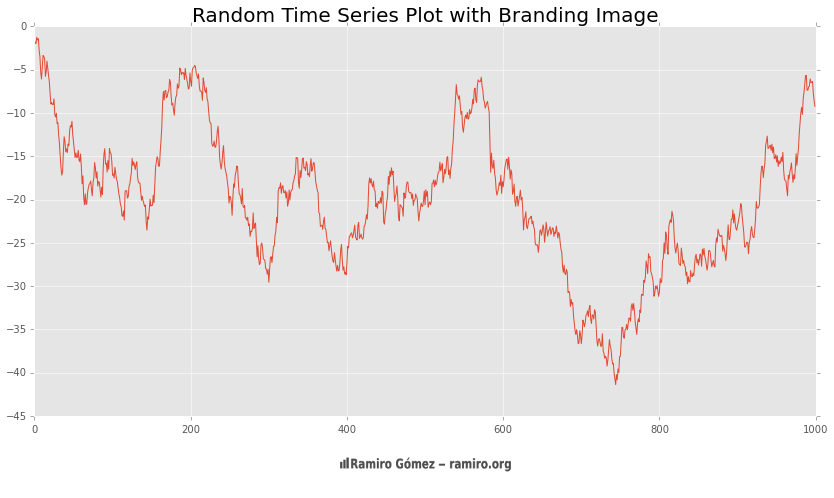

In [3]:
title = 'Random Time Series Plot with Branding Image'

gs = gridspec.GridSpec(2, 1, height_ratios=[24,1])

ax1 = plt.subplot(gs[0])
ax1.set_title(title, size=20)
ax1.figure.set_figwidth(14)
ax1.figure.set_figheight(8)
ax1.plot(ts)

ax2 = plt.subplot(gs[1])
img = ax2.imshow(logo)
ax2.axis('off')

plt.savefig('img/{}.png'.format(helpers.slug(title)), bbox_inches='tight')

Here we don't need to bother about covering any features of the graph, but positioning the image can be cumbersome if the default position does not work well. This can be addressed by providing the `extent` argument to `imshow`, but depends on the image and the subplot sizes and needs to be adjusted for each plot created like that.

## Summary

We implemented two methods of branding plots with matplotlib, both of which require individual adjustments for each created plot. Obviously, you could also stitch images together using other libraries and tools, but I'm sure there are different and maybe better approaches using matplotlib API's. If you know another solution, that you want to share, you can leave a comment or create and issue in the [GitHub repo](https://github.com/yaph/ipython-notebooks). I appreciate your feedback.

In [4]:
%signature